In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import ndimage

In [2]:
def get_contour(img, team):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gaus = cv2.GaussianBlur(gray, (11, 11), 0)
    th2 = cv2.adaptiveThreshold(gaus, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)
    contours = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
    contours = [x for x in contours if cv2.contourArea(x) > 60000]
    party = []
    for i, c in enumerate(contours):
        x, y, w, h = cv2.boundingRect(c)
        trim = img[y:y+h, x:x+w]
        party.append([np.sum(trim[:, :, 0] > trim[:, :, 1]), c])
    return team(party, key=lambda x:x[0])[1]

In [3]:
img_path = "./error0.jpg"
img = cv2.imread(img_path)
orgHeight, orgWidth = img.shape[:2]

area = orgHeight * orgWidth

magni = 1000 / orgWidth
img = cv2.resize(img, (int(orgWidth * magni), int(orgHeight * magni)))
print(int(orgWidth*magni), int(orgHeight*magni))

1000 562


In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gaus = cv2.GaussianBlur(gray, (5, 5), 0)
# lap = cv2.Laplacian(gaus, cv2.CV_8UC1)

# sobel = cv2.Sobel(gaus, cv2.CV_8UC1, 0,1,ksize=3)
# bila = cv2.bilateralFilter(gray, 9, 40, 40)
# blur = cv2.blur(gray, (5,5), 0)
# lap = cv2.Laplacian(gaus, cv2.CV_8UC1)
# canny_img = cv2.Canny(gray, 100, 200)
# print(lap.shape)
# _, th2 = cv2.threshold(gaus, 100, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gaus, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)
contours = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
contours = [x for x in contours if cv2.contourArea(x) > 55000]
# contours

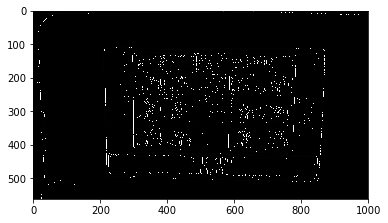

In [5]:
plt.imshow(th2, cmap="gray")
# plt.imshow(canny_img, cmap="gray")

5


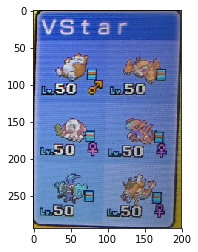

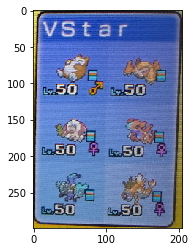

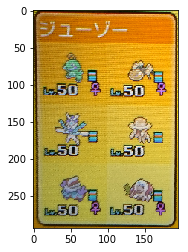

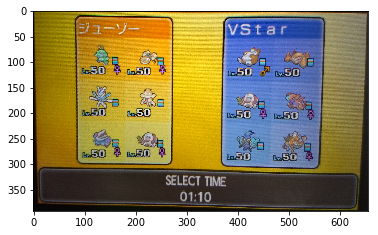

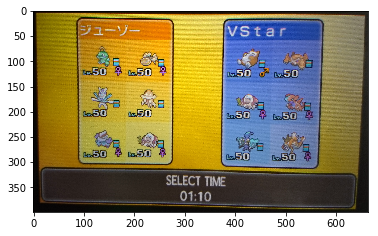

In [6]:
party = []
print(len(contours))
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    trim = img[y:y+h, x:x+w]
    party.append([np.sum(trim[:, :, 0] > trim[:, :, 1]), c])
    plt.figure()
    plt.imshow(trim)

In [7]:
np.array(min(party, key=lambda x: x[0])[1]).shape

(87, 1, 2)

In [8]:
min(party, key=lambda x: x[0])[1]

array([[[595, 131]],

       [[596, 130]],

       [[767, 130]],

       [[768, 131]],

       [[769, 131]],

       [[770, 130]],

       [[772, 130]],

       [[773, 131]],

       [[776, 131]],

       [[777, 132]],

       [[778, 132]],

       [[779, 133]],

       [[779, 134]],

       [[781, 136]],

       [[781, 137]],

       [[782, 138]],

       [[782, 149]],

       [[781, 150]],

       [[782, 151]],

       [[782, 153]],

       [[781, 154]],

       [[781, 181]],

       [[780, 182]],

       [[780, 214]],

       [[779, 215]],

       [[779, 243]],

       [[778, 244]],

       [[778, 271]],

       [[777, 272]],

       [[777, 293]],

       [[776, 294]],

       [[776, 323]],

       [[775, 324]],

       [[775, 350]],

       [[774, 351]],

       [[774, 375]],

       [[773, 376]],

       [[773, 399]],

       [[772, 400]],

       [[772, 416]],

       [[770, 418]],

       [[770, 419]],

       [[768, 421]],

       [[767, 421]],

       [[766, 422]],

       [[7

In [9]:
rect = cv2.minAreaRect(party, key=lambda x: x[0])

TypeError: minAreaRect() takes at most 1 argument (2 given)

In [10]:
rect = cv2.minAreaRect(min(party, key=lambda x: x[0])[1])

In [11]:
box = cv2.boxPoints(rect)

In [12]:
box = sorted(box, key=lambda x: x[1])

In [13]:
target = [box[0], box[1]] if np.linalg.norm((box[0] - box[1]).astype(np.float64)) < np.linalg.norm((box[1] - box[2]).astype(np.float64)) else [box[1], box[2]]
k = math.atan2(target[1][0] - target[0][0], target[1][1] - target[0][1])
result = ndimage.rotate(img, 90 - math.degrees(k))

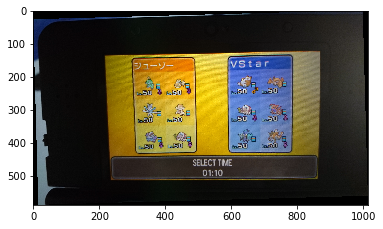

In [14]:
plt.imshow(result)

In [15]:
x, y, w, h = cv2.boundingRect(min(party, key=lambda x: x[0])[1])
a = result[y:y+h, x:x+w]

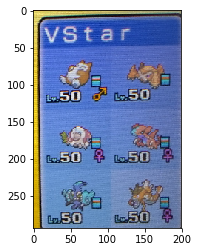

In [16]:
plt.imshow(a)